## Prepare environment
* conda create --name atlas python=3.6
* pip install tensorflow==1.5
* pip install keras --upgrade
* pip install scikit-learn
* pip install pandas
* pip install ipykernel
* sudo env PATH=$PATH python -m ipykernel install --name atlas

## Tutorials
https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [1]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras import backend as K

Using TensorFlow backend.


In [2]:
# Load the model
from keras.models import load_model
model = load_model('./zoomed_vs_normal.h5')

In [3]:
import numpy as np
def preprocess(X):
    mean = np.array([27.04171, 27.04171, 27.04171]).reshape(1,1,3)
    std = np.array([83.20263, 83.20263, 83.20263]).reshape(1,1,3)
    X -= mean
    X /= (std + K.epsilon())
    return X    

In [4]:
from keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(preprocessing_function=preprocess)

In [5]:
# The images should be under the directory whose name is the class name of the images, directory structure should be /test/class_name/
jeans_test = test_datagen.flow_from_directory("/home/../test",
                                target_size=(150,150),
                                class_mode=None,
                                shuffle=False)

Found 7932 images belonging to 3 classes.


In [9]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
# %%time
predictions = model.predict_generator(jeans_test)

In [10]:
import pandas as pd
pred_df = pd.DataFrame({'filenames':jeans_test.filenames,'predictions':predictions.ravel()})
pred_df['label'] = (pred_df.predictions > 0.5).astype(int)

In [27]:
pd.options.display.max_colwidth=-1
pred_df[pred_df.label==1].head()

,filenames,predictions,label
61,pyjama/961c.jpeg,0.917194,1
72,pyjama/Liberty.jpeg,0.879416,1


In [11]:
from IPython.display import display
from IPython.display import Image as _Imgdis
import os
import json
import shutil

In [13]:
from collections import Counter
obj = json.load(open("/home/../test/data.json"))
dict_of_path = Counter(j['file_path'] for j in obj)
list_of_path = []
for k,v in dict_of_path.items():
    if v == 1:
        list_of_path.append(k)
)
sample_image_path = '/home/../Atlas/DataCollection/images/Men/Inner Wear/Pyjama/Myntra/images/806c'

for i in range(len(obj)):
    if sample_image_path in list_of_path and obj[i]['file_path']==sample_image_path:
        print(obj[i])




{'product_image_url': 'https://assets.myntassets.com/h_720,q_90,w_540/v1/assets/images/7007826/2018/7/24/cfea3761-806c-4b45-ab94-67e947c0584f1532416570655-Marvel-Comics-By-Free-Authority-Mens-Pajama-7921532416570423-1.jpg', 'file_path': '/home/et/Desktop/Atlas/DataCollection/images/Men/Inner Wear/Pyjama/Myntra/images/806c', 'product_page_url': 'https://www.myntra.com/pyjamas/free-authority/sweet-dreams-men-multicolored-printed-marvel-pyjamas-8903346795130/7007826/buy', 'product_price': 'Rs. 319', 'product_title': 'Free AuthoritySweet Dreams Men Multicolored Printed Marvel Pyjamas 8903346795130', 'taxonomy': 'Men->Inner Wear->Pyjama', 'product_description': 'A pair of multicolored knitted mid-rise pyjamas, has an elasticated waistband with drawstring closure, 2 pockets'}


In [31]:
file_path = '/home/../test/Zoom'
if not os.path.exists(file_path):
    os.makedirs(file_path)
obj = json.load(open("/home/../test/data.json"))
p_list = []


for img in pred_df[pred_df.label==1].sample(frac=1.0).iterrows():
    p0 = img[1].filenames.split('/')[1]
    p = p0.split('.jpeg')[0]
    shutil.move('/home/../test/pyjama/'+p0, file_path)
    for i in range(len(obj)):
        if(obj[i]["file_path"])



<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


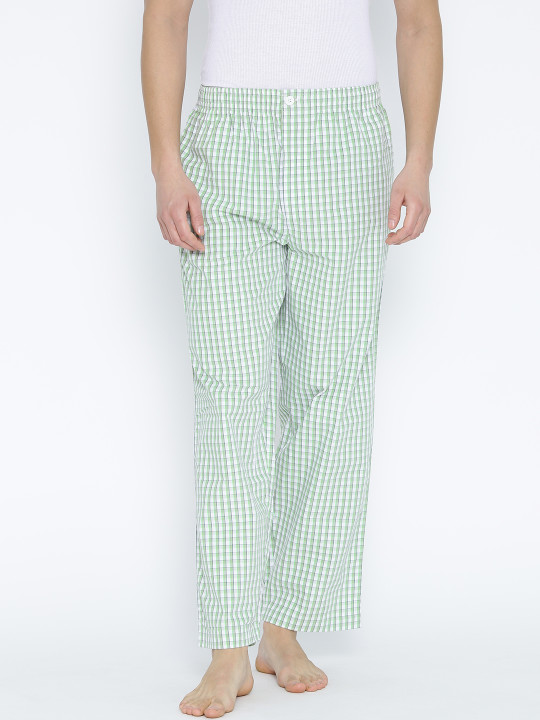

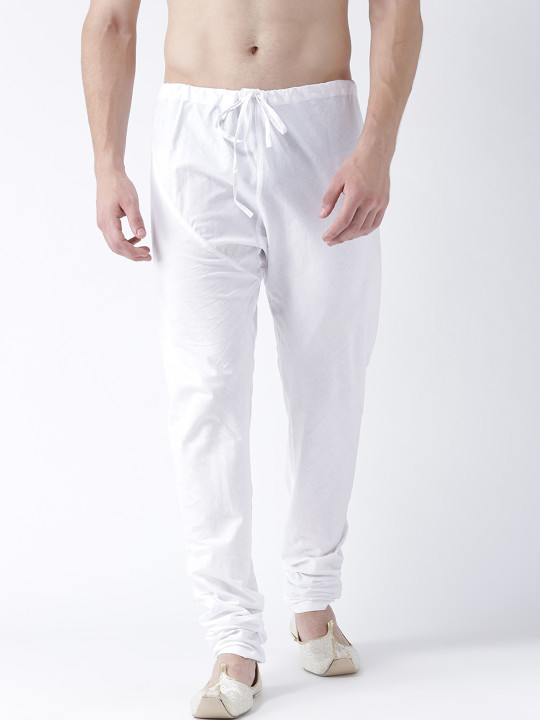

In [10]:
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
for img in pred_df[pred_df.label==1].sample(frac=1.0).head().iterrows():
    display(_Imgdis(filename='/home/../test/'+img[1].filenames))

In [ ]:
file_path = '/home/../Normal'
if not os.path.exists(file_path):
    os.makedirs(file_path)
obj = json.load(open("/home/../test/data.json"))
p_list = []

for img in pred_df[pred_df.label==0].sample(frac=1.0).iterrows():
    p0 = img[1].filenames.split('/')[1]
    p = p.split('.jpeg')[0]
    shutil.move('/home/../test/pyjama/'+p0, file_path)
    for i in range(len(obj)):
        if obj[i]["file_path"] == "/home/../Atlas/DataCollection/images/Men/Inner Wear/Pyjama/Myntra/images/"+p:
            p_list.append(obj[i])



with open('/home/../test/normal.json', 'w') as outfile:
    json.dump(p_list, outfile)

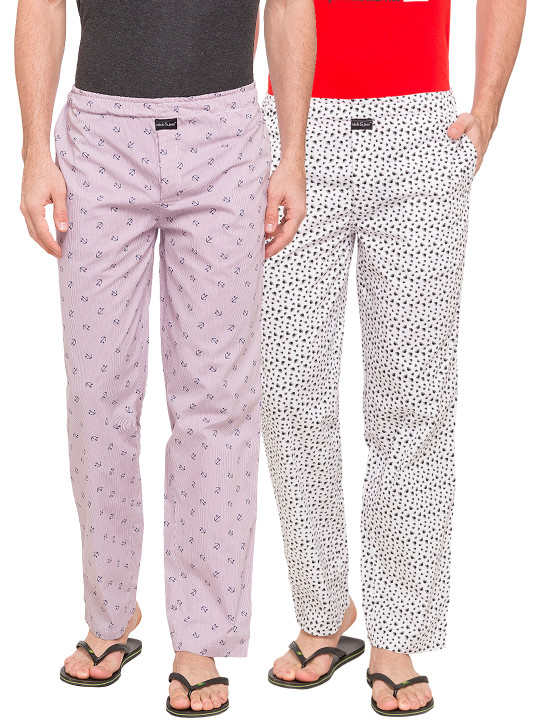

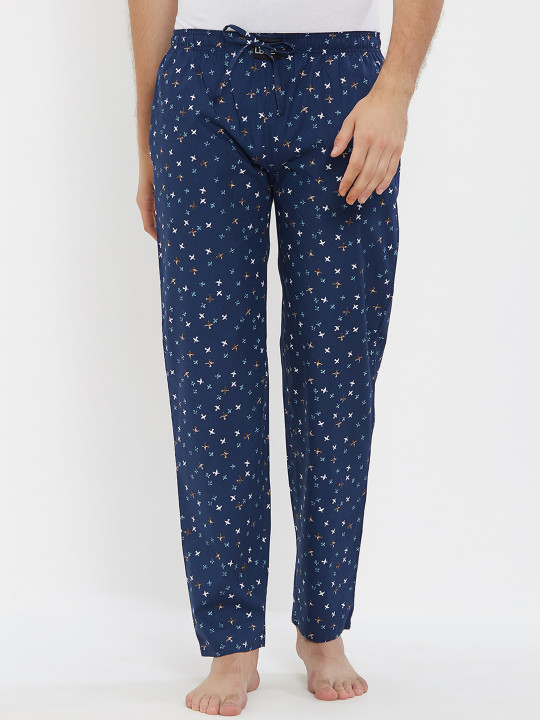

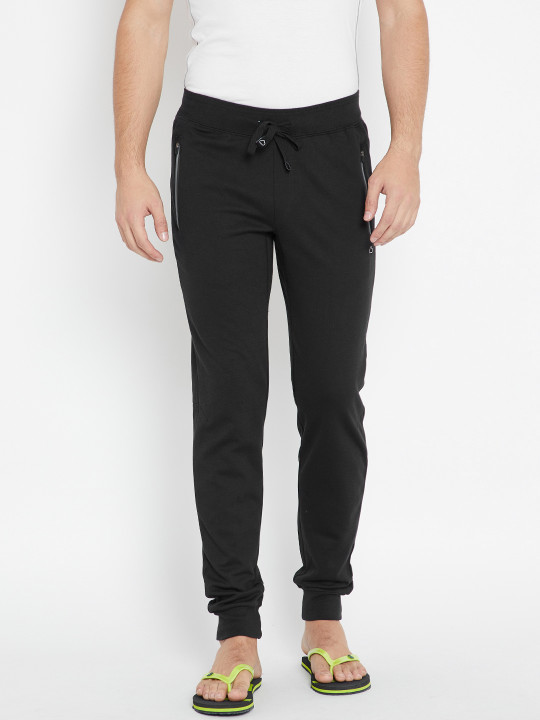

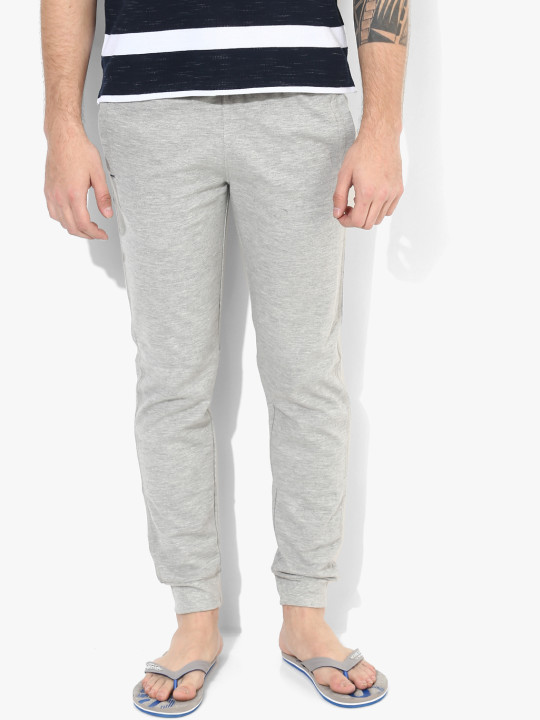

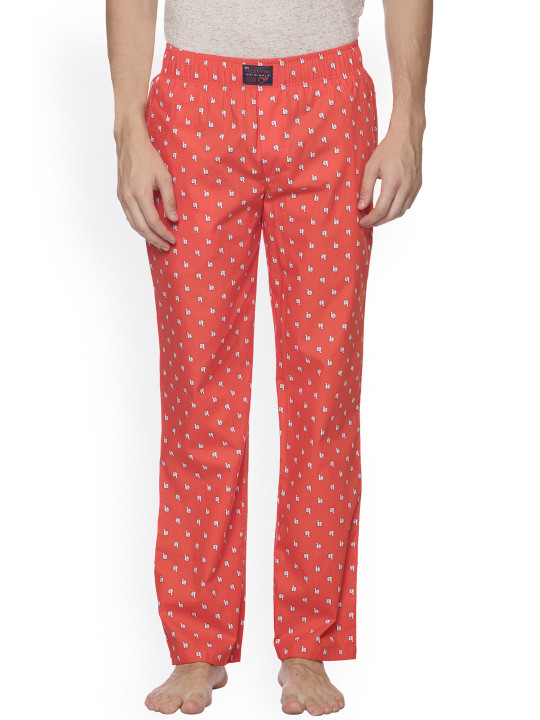

In [11]:
for img in pred_df[pred_df.label==0].sample(frac=1.0).head().iterrows():
    display(_Imgdis(filename='/home/../test/'+img[1].filenames))